In [36]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PyGMO.problem import base
from PyGMO import *
import subprocess
import random
from time import sleep

executable = "./sphere_intercalation_PD.e"
target_file = "PD_targets/target_limb_like_0.75_0.0_1.0_0.0_0.5.Tf_0.vtk"
run_identifier = "lolll"

class sphere_intercalation(base):
    """
    Basic sphere of tissue with cell intercalation that parametrises the cell-
    level orientations for the intercalation process
    """

    _sphere_intercalation__dim = 5

    def __init__(self, dim = 5, own_arg = 0):
        # First we call the constructor of the base class telling PyGMO
        # what kind of problem to expect ('dim' dimensions, 1 objective, 0 contraints etc.)
        super(sphere_intercalation,self).__init__(dim)

        # We set the problem bounds (in this case equal for all components)
        self.set_bounds(0, 1)

        self.own_id = own_arg

    # Reimplement the virtual method that defines the objective function.
    def _objfun_impl(self, x):

        # print("start", self.own_id)
        model_call = [executable, target_file, "dummy", "false"] + [str(i) for i in x]
        result = subprocess.run(model_call, stdout=subprocess.PIPE)

        f = float(result.stdout.decode('utf-8'))
        # print("end", self.own_id)

        # Note that we return a tuple with one element only. In PyGMO the objective functions
        # return tuples so that multi-objective optimization is also possible.
        return (f, )


    # Finally we also reimplement a virtual method that adds some output to the __repr__ method
    def human_readable_extra(self):
        return "\n\t Problem dimension: " + str(self.__dim)


In [39]:
import time
population_size = 6
n_generations_per_iter = 1
n_iter = 50
algo = algorithm.de(gen = n_generations_per_iter)
x = []
y = []

for k in range (1,20,2):
    archi = archipelago(topology=topology.unconnected())
    #print("scale", k)
    for i in range (k):
        archi.push_back(island(algo, sphere_intercalation(dim = 5, own_arg = i), 6))

    starting_time = time.time()
    archi.evolve(1)
    archi.join()
    elapsed_time = time.time() - starting_time
    print("scale", k, "elapsed time", elapsed_time)
    x.append(k)
    y.append(elapsed_time/k)
        

scale 1 elapsed time 8.773287773132324
scale 3 elapsed time 19.5307559967041
scale 5 elapsed time 30.738726139068604
scale 7 elapsed time 42.21100926399231
scale 9 elapsed time 51.90342617034912
scale 11 elapsed time 62.5924973487854
scale 13 elapsed time 74.4112982749939
scale 15 elapsed time 87.08477210998535
scale 17 elapsed time 107.26725196838379
Exception caught during evolution:
Exception caught during evolution:could not convert string to float: 
Exception caught during evolution:
could not convert string to float: 
could not convert string to float: 

Exception caught during evolution:Exception caught during evolution:

could not convert string to float: 
could not convert string to float: 
Exception caught during evolution:
Exception caught during evolution:
could not convert string to float: Exception caught during evolution:

could not convert string to float: Exception caught during evolution:could not convert string to float: 
Exception caught during evolution:Exception c

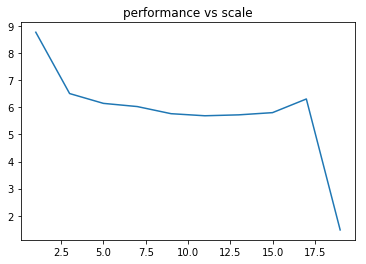

In [41]:
plt.plot(x,y)
plt.title('performance vs scale')
plt.show()